Fem els imports necessaris

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay


### Coneixent la base de dades

Carreguem la base de dades 

In [4]:
# Carreguem dataset rain in Australia
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

#dataset = load_dataset('data/Fish.csv')
dataset = load_dataset('Fish.csv')
print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD: (159, 7)


In [5]:
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.000,23.200,25.400,30.000,11.520,4.020
1,Bream,290.000,24.000,26.300,31.200,12.480,4.306
2,Bream,340.000,23.900,26.500,31.100,12.378,4.696
3,Bream,363.000,26.300,29.000,33.500,12.730,4.455
4,Bream,430.000,26.500,29.000,34.000,12.444,5.134


Visualitzem característiques generals sobre els atributs, com el seu tipus i si tenen algun valor NULL.

In [6]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Preparació de la base de dades 

Canviem els noms de les columnes LengthX, per noms més representatius

In [7]:
dataset = dataset.rename(columns={"Length1": "len_vertical", "Length2": "len_horitzontal", "Length3": "len_diagonal"})

In [8]:
print("Visualitzem el tipus de cada atribut, el seu domini:")

for i in dataset.columns:
    if dataset[i].dtype == 'object':
        print(f"{i}    \nValues: {dataset[i].unique()}", )
    else:
        print(f"{i}    \nMean_std: {dataset[i].mean():.3f} {dataset[i].std():.3f}", )

Visualitzem el tipus de cada atribut, el seu domini:
Species    
Values: ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
Weight    
Mean_std: 398.326 357.978
len_vertical    
Mean_std: 26.247 9.996
len_horitzontal    
Mean_std: 28.416 10.716
len_diagonal    
Mean_std: 31.227 11.610
Height    
Mean_std: 8.971 4.286
Width    
Mean_std: 4.417 1.686


Mirem les correlacions entre els atributs len_X, ja que poden ser redundants

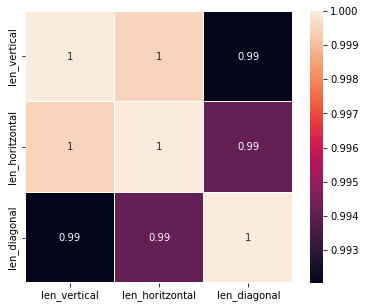

In [9]:
dataset_len = pd.concat([dataset['len_vertical'],dataset['len_horitzontal'], dataset['len_diagonal']], axis= 1)
correlacio = dataset_len.corr()
plt.figure(figsize=(6,5))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

Per saber quin eliminar, fem correlacio amb Species

In [10]:
dataset_species = dataset.copy()
llistaEspecies = ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
aux = 1
for especie in llistaEspecies:
    dataset_species.loc[dataset_species.Species == especie, 'Species'] = aux
    aux = aux+1
    
dataset_len['Species'] = dataset_species['Species'].astype('int64')

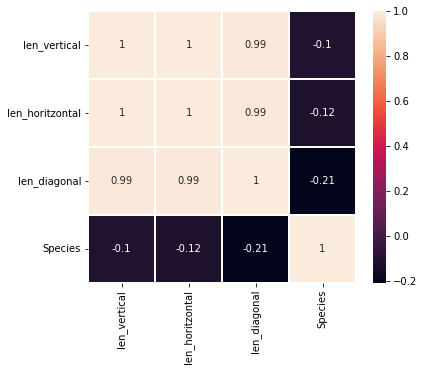

In [11]:
correlacio = dataset_len.corr()
plt.figure(figsize=(6,5))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

Creem nou dataset eliminant len_vertical i len_horitzontal del dataset original perque son redundants

In [12]:
dataset_def = dataset.copy()
dataset_def = dataset_def.drop('len_vertical', axis = 1)
dataset_def = dataset_def.drop('len_horitzontal', axis = 1)

dataset_def.head()

,Species,Weight,len_diagonal,Height,Width
0,Bream,242.000,30.000,11.520,4.020
1,Bream,290.000,31.200,12.480,4.306
2,Bream,340.000,31.100,12.378,4.696
3,Bream,363.000,33.500,12.730,4.455
4,Bream,430.000,34.000,12.444,5.134


### Preprocessament de dades

#### Tractament de valors nuls

Mirem si tenim algun valor null i la seva distribució:

Species            0
Weight             0
len_vertical       0
len_horitzontal    0
len_diagonal       0
Height             0
Width              0
dtype: int64


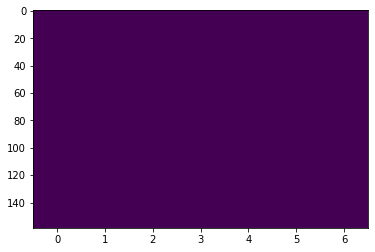

In [13]:
nuls = dataset.isnull().sum()
print(nuls)

plt.imshow(dataset.isna(), aspect='auto')

No tenim cap valor NULL a la base de dades. Mirem els 0's. 

In [14]:
print(dataset_def[dataset_def["len_diagonal"] == 0])
print(dataset_def[dataset_def["Width"] == 0])
print(dataset_def[dataset_def["Height"] == 0])
print(dataset_def[dataset_def["Species"] == 0])
print(dataset_def[dataset_def["Weight"] == 0])

Empty DataFrame
Columns: [Species, Weight, len_diagonal, Height, Width]
Index: []
Empty DataFrame
Columns: [Species, Weight, len_diagonal, Height, Width]
Index: []
Empty DataFrame
Columns: [Species, Weight, len_diagonal, Height, Width]
Index: []
Empty DataFrame
Columns: [Species, Weight, len_diagonal, Height, Width]
Index: []
   Species  Weight  len_diagonal  Height  Width
40   Roach   0.000        22.800   6.475  3.352


In [15]:
dataset_def[dataset_def["Weight"] == 0]

,Species,Weight,len_diagonal,Height,Width
40,Roach,0.000,22.800,6.475,3.352


La fila 40 té un 0 a Weigth, es impossible ja que un peix no pot pesar 0 grams. Utilitzem el KNNImputer per inferir aquest valor. Primer passem el 0 a nan i despres usem la funció KNNImputer.

In [16]:
dataset_def.loc[dataset_def['Weight'] == 0, 'Weight'] = np.nan

for i in dataset_def.columns:
        print(f"{i} \nNaNs: {dataset_def[i].isna().sum()}", )

Species 
NaNs: 0
Weight 
NaNs: 1
len_diagonal 
NaNs: 0
Height 
NaNs: 0
Width 
NaNs: 0


In [17]:
from sklearn.impute import KNNImputer

dataset_species = dataset_def.copy()
llistaEspecies = ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
aux = 1
for especie in llistaEspecies:
    dataset_species.loc[dataset_species.Species == especie, 'Species'] = aux
    aux = aux+1

imputer = KNNImputer(n_neighbors=10, weights="distance")
dataset_def_imp = imputer.fit_transform(dataset_species)

Mirem quina distància a inferit i en quina mesura aquesta està encertada

In [18]:
dataset_def_imp[40]

array([  2.       , 119.6359698,  22.8      ,   6.4752   ,   3.3516   ])

In [19]:
dataset_def.fillna(119.6359698, inplace=True)

dataset_def[dataset_def["Weight"] == 119.6359698]

,Species,Weight,len_diagonal,Height,Width
40,Roach,119.636,22.800,6.475,3.352


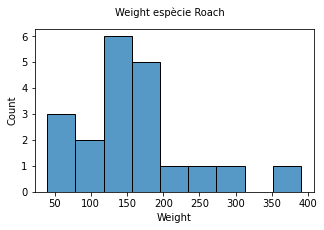

In [20]:
dataset_roach = dataset_def.loc[dataset_def['Species'] == 'Roach']

fig, axes = plt.subplots(figsize=(5,3))
fig.suptitle('Weight espècie Roach', fontsize=10, color = "black")
sns.histplot(data = dataset_roach['Weight']);

#### Tractament de dades categòriques

Creem nou dataset amb l'atribut objectiu categoric passat a númeric amb l'estratègia de label encoding

In [21]:
dataset_def_le = dataset_def.copy()
encoder = LabelEncoder()
y = dataset_def_le['Species']
dataset_def_le['Species'] = encoder.fit_transform(dataset_def_le['Species'])
y_mappings_ng = {index: label for index, label in enumerate(encoder.classes_)}
y_mappings_ng

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

In [22]:
dataset_def['Species']

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

#### Tractament d'outliers

Definim els outliers (valors numèrics de cada atribut del dataset que són molt diferents a la resta de la columna, això pot causar problemes en l'anàlisi de les dades i la posterior creació d'un model que funcioni). Es aconsellable treure'ls abans de continuar amb el preprocessament de dades. 

Observem la distribució de les dades on podrem intuir els outliers

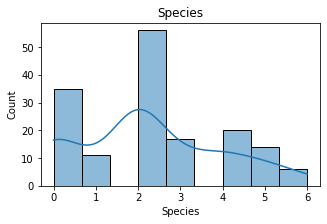

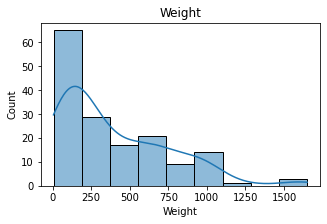

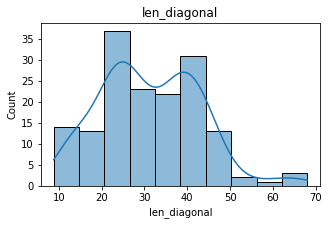

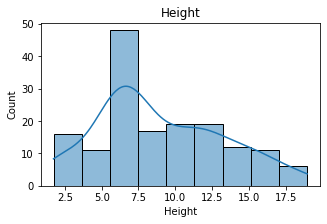

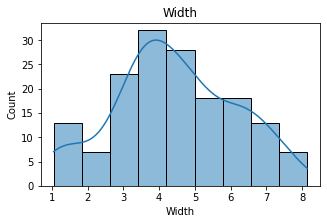

In [23]:
num_cols = dataset_def_le.select_dtypes(include="number").columns

for i, col in enumerate(num_cols):
    fig, axes = plt.subplots(figsize=(5,3))
    axes.set_title(col)  
    sns.histplot(data = dataset_def_le[col], kde=True);


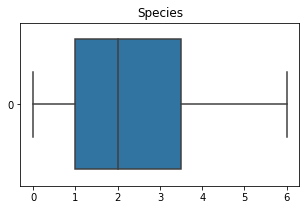

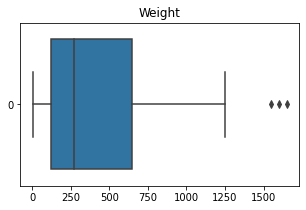

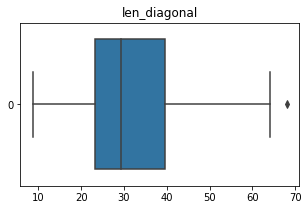

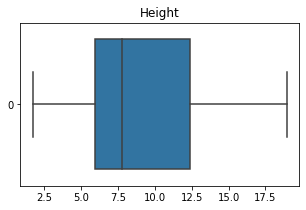

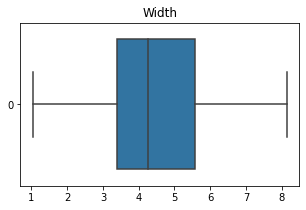

In [24]:
num_cols = dataset_def_le.select_dtypes(include="number").columns

for i,col in enumerate(num_cols):
    fig, axes = plt.subplots(figsize=(5,3))
    axes.set_title(col)
    sns.boxplot(data = dataset_def_le[col], orient = "h");

Els outliers en aquest cas son els punts que es troben fora dels bigotis del diagrama de caixes, fent una ullada rapida tenim outliers a: weight i a len_diagonal. 
Abans de possar-nos a eliminar aquests outliers, ens interessa saber on trobem aquests outliers. 

In [25]:
print("TRACTAMENT OUTLIERS DE WEIGHT")

Q1 = dataset_def_le['Weight'].quantile(0.25)
Q3 = dataset_def_le['Weight'].quantile(0.75)
IQR = Q3-Q1
mitjana = dataset_def_le['Weight'].median()
minim = dataset_def_le['Weight'].min()
maxim = dataset_def_le['Weight'].max()

print("quartil 1: ", Q1, "     quartil 3: ", Q3, "        rang interquartil: ", IQR)
print("mitjana: ", mitjana, "     valor minim: ", minim, "        valor maxim: ", maxim)


TRACTAMENT OUTLIERS DE WEIGHT
quartil 1:  120.0      quartil 3:  650.0         rang interquartil:  530.0
mitjana:  273.0      valor minim:  5.9         valor maxim:  1650.0


In [26]:
bigoti_inferior = (Q1 - 1.5*IQR)
bigoti_superior = (Q3 + 1.5*IQR)

print(" bigoti inferior: ", bigoti_inferior, "     bigoti superior: ", bigoti_superior)

 bigoti inferior:  -675.0      bigoti superior:  1445.0


Trobem les files que on es troben els outliers, tenint en compte que només tenim outliers en valors més grans del bigoti superior

In [27]:
outliers = (dataset_def_le['Weight'] > bigoti_superior)
print(dataset_def_le[outliers])

     Species   Weight  len_diagonal  Height  Width
142        3 1600.000        64.000   9.600  6.144
143        3 1550.000        64.000   9.600  6.144
144        3 1650.000        68.000  10.812  7.480


Els outliers pertanyen tots a la mateixa especie (Pike), analitzarem ara quin és el valor de weight que acostumen a tenir els peixos Pike.

In [28]:
dataset_plot = dataset_def_le[dataset_def_le['Species'] == 3]

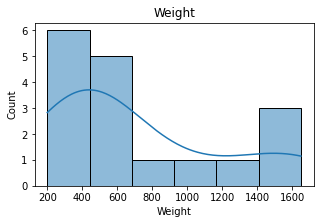

In [29]:
fig, axes = plt.subplots(figsize=(5,3))
axes.set_title('Weight')  
sns.histplot(data = dataset_plot['Weight'], kde=True);

Els valors en aquest cas són molt diferents, no sé si es poden considerar outliers. 

In [30]:
print("TRACTAMENT OUTLIERS DE LEN_DIAGONAL")

Q1 = dataset_def_le['len_diagonal'].quantile(0.25)
Q3 = dataset_def_le['len_diagonal'].quantile(0.75)
IQR = Q3-Q1
mitjana = dataset_def_le['len_diagonal'].median()
minim = dataset_def_le['len_diagonal'].min()
maxim = dataset_def_le['len_diagonal'].max()

print("quartil 1: ", Q1, "     quartil 3: ", Q3, "        rang interquartil: ", IQR)
print("mitjana: ", mitjana, "     valor minim: ", minim, "        valor maxim: ", maxim)

TRACTAMENT OUTLIERS DE LEN_DIAGONAL
quartil 1:  23.15      quartil 3:  39.650000000000006         rang interquartil:  16.500000000000007
mitjana:  29.4      valor minim:  8.8         valor maxim:  68.0


In [31]:
bigoti_inferior = (Q1 - 1.5*IQR)
bigoti_superior = (Q3 + 1.5*IQR)

print(" bigoti inferior: ", bigoti_inferior, "     bigoti superior: ", bigoti_superior)

 bigoti inferior:  -1.600000000000012      bigoti superior:  64.40000000000002


In [32]:
outliers = (dataset_def_le['len_diagonal'] > bigoti_superior)
#outliers = outliers['Weight'] > bigoti_superior
print(dataset_def_le[outliers])

     Species   Weight  len_diagonal  Height  Width
144        3 1650.000        68.000  10.812  7.480


L'outlier també és de l'espècie 3

In [33]:
dataset_plot = dataset_def_le[dataset_def_le['Species'] == 3]

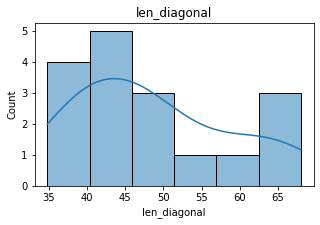

In [34]:
fig, axes = plt.subplots(figsize=(5,3))
axes.set_title('len_diagonal')  
sns.histplot(data = dataset_plot['len_diagonal'], kde=True);

Continuent sent valors molt dispars, no sé si es pot considerar outlier

#### Balancejament de classes

L'únic atribut de tipus object és l'atribut objectiu. Visualitzem de l'atribut objectiu, com estan repartides les mostres. 

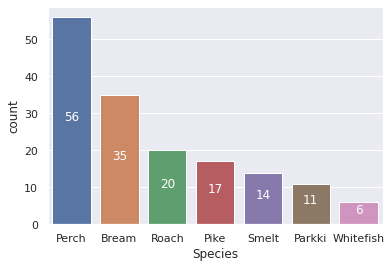

In [35]:
# Bar Graph of Species 
sns.set_theme(style="darkgrid")

bar_graph = sns.countplot(data = dataset, x= dataset["Species"], order = dataset["Species"].value_counts().index)

unique = dataset["Species"].value_counts()
for i in range(len(unique)):
    bar_graph.text(i, unique[i]/2, str(unique[i]), color ="white", horizontalalignment = "center")

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}
 
 Juntem les classes: Smelt, Parkki i Whitefish.

In [36]:
dataset_def.head()

,Species,Weight,len_diagonal,Height,Width
0,Bream,242.000,30.000,11.520,4.020
1,Bream,290.000,31.200,12.480,4.306
2,Bream,340.000,31.100,12.378,4.696
3,Bream,363.000,33.500,12.730,4.455
4,Bream,430.000,34.000,12.444,5.134


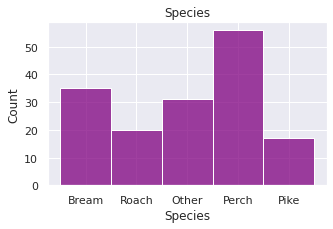

In [37]:
dataset_def_group = dataset_def.copy()
dataset_def_group.loc[dataset_def_group['Species'] == 'Smelt', 'Species'] = 'Other'
dataset_def_group.loc[dataset_def_group['Species'] == 'Parkki', 'Species'] = 'Other'
dataset_def_group.loc[dataset_def_group['Species'] == 'Whitefish', 'Species'] = 'Other'

fig, axes = plt.subplots(figsize=(5,3))
axes.set_title('Species')  
sns.histplot(data = dataset_def_group['Species'], color='purple');

Fem label encoding al nou dataset

In [38]:
dataset_group_le = dataset_def_group.copy()
encoder = LabelEncoder()
y = dataset_group_le['Species']
dataset_group_le['Species'] = encoder.fit_transform(dataset_group_le['Species'])
y_mappings_g = {index: label for index, label in enumerate(encoder.classes_)}
y_mappings_g

{0: 'Bream', 1: 'Other', 2: 'Perch', 3: 'Pike', 4: 'Roach'}

Mirem la distribució de les dades

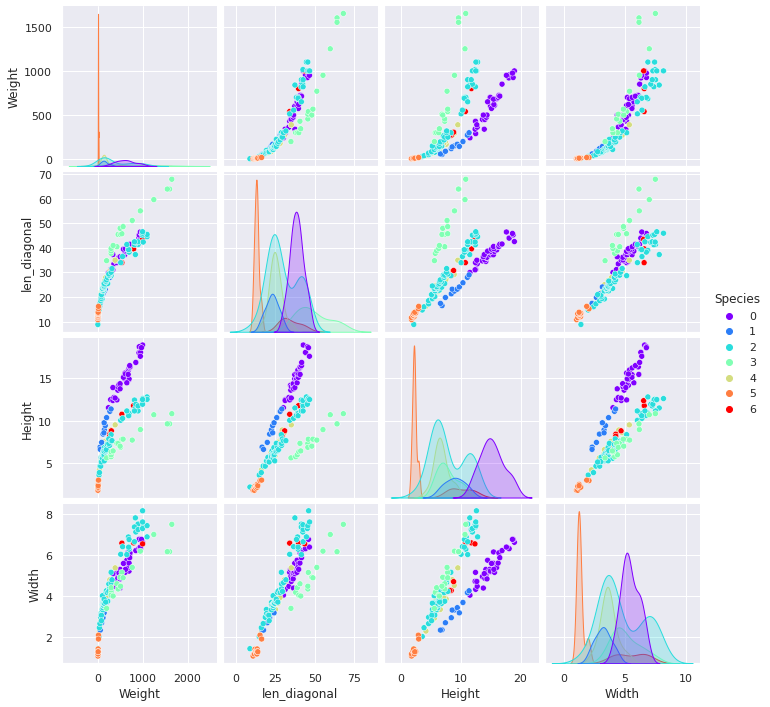

In [39]:
sns.pairplot(dataset_def_le, hue="Species", palette="rainbow");

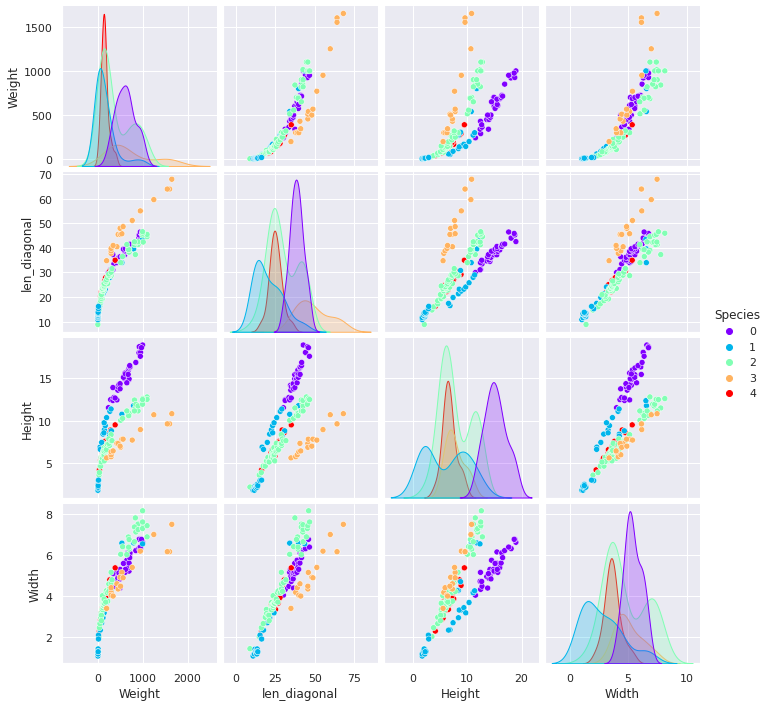

In [40]:
sns.pairplot(dataset_group_le, hue="Species", palette="rainbow");

#### Normalitzem les dades

In [41]:
dataset_def_le.head()

,Species,Weight,len_diagonal,Height,Width
0,0,242.000,30.000,11.520,4.020
1,0,290.000,31.200,12.480,4.306
2,0,340.000,31.100,12.378,4.696
3,0,363.000,33.500,12.730,4.455
4,0,430.000,34.000,12.444,5.134


In [42]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

dataset_def_le_norm = dataset_def_le.copy()
dataset_def_le_norm[dataset_def_le_norm.columns] = ss.fit_transform(dataset_def_le_norm[dataset_def_le_norm.columns])  ##nornalitzacio de dades --> mitjana 0, desviació tipica 1

dataset_def_le_norm.head()

,Species,Weight,len_diagonal,Height,Width
0,-1.333,-0.441,-0.106,0.597,-0.237
1,-1.333,-0.306,-0.002,0.821,-0.067
2,-1.333,-0.166,-0.011,0.797,0.166
3,-1.333,-0.101,0.196,0.880,0.023
4,-1.333,0.087,0.240,0.813,0.426


In [43]:
dataset_group_le.head()

,Species,Weight,len_diagonal,Height,Width
0,0,242.000,30.000,11.520,4.020
1,0,290.000,31.200,12.480,4.306
2,0,340.000,31.100,12.378,4.696
3,0,363.000,33.500,12.730,4.455
4,0,430.000,34.000,12.444,5.134


In [44]:
ss2 = StandardScaler()
dataset_group_le_norm = dataset_group_le.copy()
dataset_group_le_norm[dataset_group_le_norm.columns] = ss.fit_transform(dataset_group_le_norm[dataset_group_le_norm.columns])  ##nornalitzacio de dades --> mitjana 0, desviació tipica 1

dataset_def_le_norm.head()

,Species,Weight,len_diagonal,Height,Width
0,-1.333,-0.441,-0.106,0.597,-0.237
1,-1.333,-0.306,-0.002,0.821,-0.067
2,-1.333,-0.166,-0.011,0.797,0.166
3,-1.333,-0.101,0.196,0.880,0.023
4,-1.333,0.087,0.240,0.813,0.426


#### PCA

Dataset no agrupat (7 espècies)

In [45]:
pca2 = PCA(n_components=2, random_state=42)
pca_2 = pca2.fit_transform(dataset_def_le_norm[dataset_def_le_norm.columns])

# Creem un dataset amb les dues components principals

df_pca = pd.DataFrame({'PC1' : pca_2[:,0], 'PC2' : pca_2[:,1], 'Species': dataset_def_le_norm['Species']})

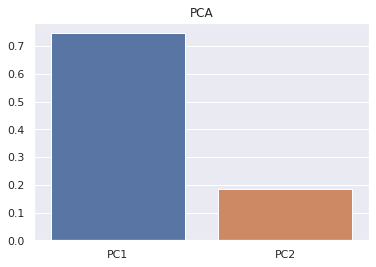

In [46]:
pca2.explained_variance_ratio_ # variança de les dues variables
pca2.explained_variance_ratio_.sum() #cuanta variança tenen aquestes dues components principals envers a totes les altres

plt.figure()
plt.title("PCA")
sns.barplot(x=['PC1', 'PC2'], y=pca2.explained_variance_ratio_)

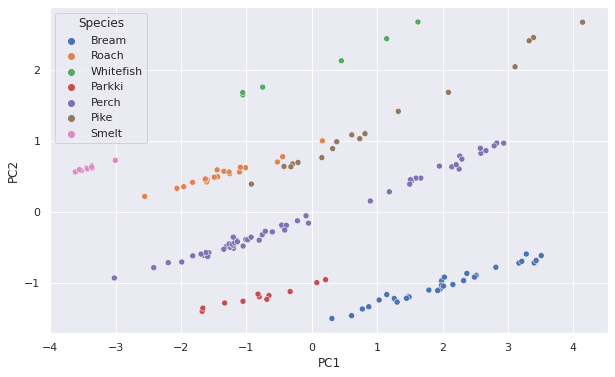

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue=dataset_def['Species'], data=df_pca)

# no es poden disntingir les clases i amb PCA

Les classes, en general, tenen una classificació molt clara en aquest anàlisi, les dues classes que poden generar confusions son: Roach i Pike.

Dataset agrupat 5 espècies

In [48]:
pca2 = PCA(n_components=2, random_state=42)
pca_group = pca2.fit_transform(dataset_group_le_norm[dataset_group_le_norm.columns])

# Creem un dataset amb les dues components principals

df_pca_g = pd.DataFrame({'PC1' : pca_group[:,0], 'PC2' : pca_group[:,1], 'Species': dataset_group_le_norm['Species']})

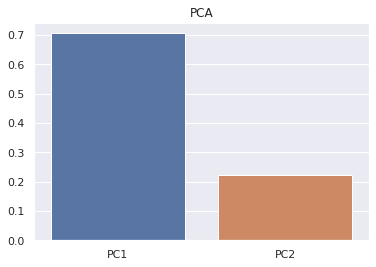

In [49]:
pca2.explained_variance_ratio_ # variança de les dues variables
pca2.explained_variance_ratio_.sum() #cuanta variança tenen aquestes dues components principals envers a totes les altres

plt.figure()
plt.title("PCA")
sns.barplot(x=['PC1', 'PC2'], y=pca2.explained_variance_ratio_)

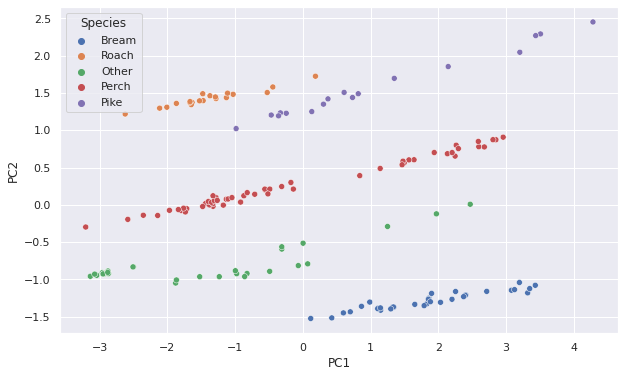

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue=dataset_def_group['Species'], data=df_pca_g)

# no es poden disntingir les clases i amb PCA

En aquest cas, veiem que les classes es diferèncien perfectament. 

Analitzem si té sentit haver esborrat atributs.

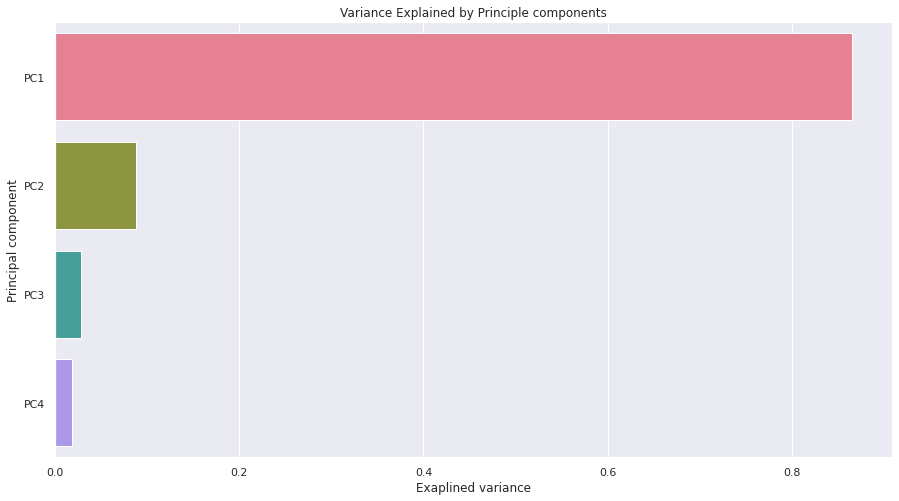

In [52]:
features = dataset_def.drop(['Species'], axis=1)
labels = dataset_def['Species']
st_scaler = StandardScaler()
X = st_scaler.fit_transform(features)
X = pd.DataFrame(X, columns=features.columns)
l_encoder = LabelEncoder()
y = l_encoder.fit_transform(labels)

num_components = X.shape[1]
PC_column_names = ['PC' + str(i) for i in range(1,num_components+1)]
pca = PCA(n_components= num_components)
pca.fit(X)
# pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
principal_component_variance_plot = plt.figure(figsize=(15,8))
principal_component_variance_plot = sns.barplot(x=explained_variance_ratio, y = PC_column_names,
                                                orient='h', palette='husl')
principal_component_variance_plot.set_title("Variance Explained by Principle components")
principal_component_variance_plot.set_xlabel("Exaplined variance");
principal_component_variance_plot.set_ylabel("Principal component");

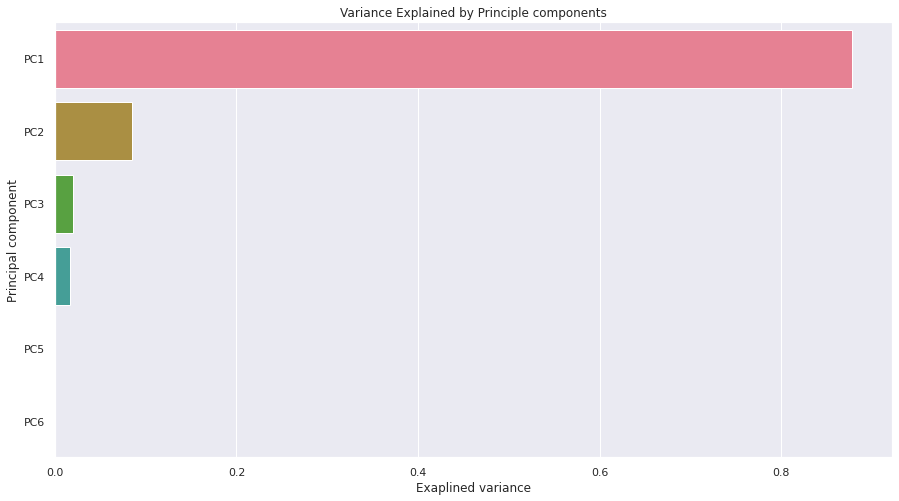

In [54]:
features = dataset.drop(['Species'], axis=1)
labels = dataset['Species']
st_scaler = StandardScaler()
X = st_scaler.fit_transform(features)
X = pd.DataFrame(X, columns=features.columns)
l_encoder = LabelEncoder()
y = l_encoder.fit_transform(labels)

num_components = X.shape[1]
PC_column_names = ['PC' + str(i) for i in range(1,num_components+1)]
pca = PCA(n_components= num_components)
pca.fit(X)
# pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
principal_component_variance_plot = plt.figure(figsize=(15,8))
principal_component_variance_plot = sns.barplot(x=explained_variance_ratio, y = PC_column_names,
                                                orient='h', palette='husl')
principal_component_variance_plot.set_title("Variance Explained by Principle components")
principal_component_variance_plot.set_xlabel("Exaplined variance");
principal_component_variance_plot.set_ylabel("Principal component");

[[ 0.41732112  0.42153507  0.42341922  0.42765824  0.34272714  0.41050454]
 [ 0.03963347  0.33510643  0.30863841  0.19682134 -0.84290984 -0.20405773]
 [ 0.21791513 -0.16568357 -0.17184112 -0.33196628 -0.38883898  0.79632608]
 [ 0.88108574 -0.16000219 -0.16636334 -0.14860507 -0.02475388 -0.38433609]
 [ 0.02155005 -0.47160422 -0.33050565  0.79988093 -0.14218868  0.08867897]
 [-0.002963    0.65920375 -0.74767532  0.0792163   0.0038703   0.01153499]]


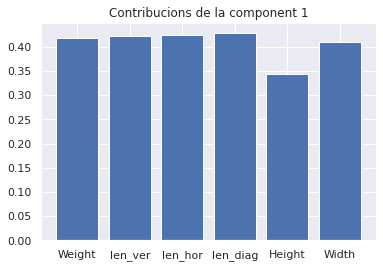

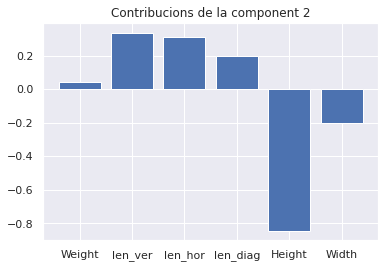

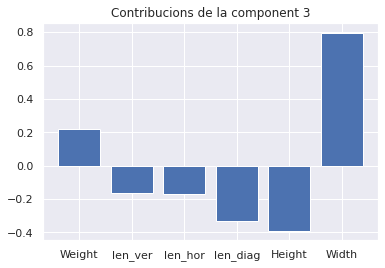

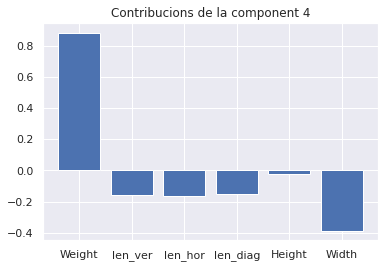

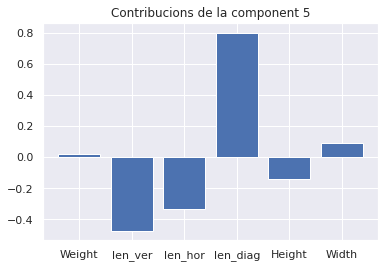

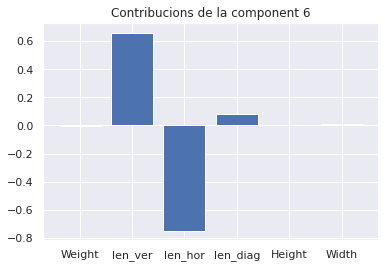

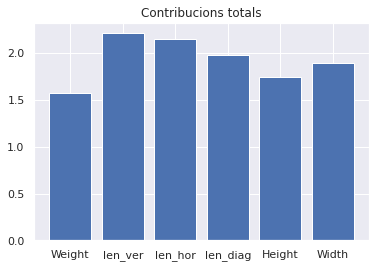

In [55]:
components = pca.components_
print(components)
N =  ['Weight','len_ver','len_hor','len_diag', 'Height','Width']

for i,vector in enumerate(components):
  plt.bar(N,vector)
  plt.title(f'Contribucions de la component {i+1}')

  plt.show()


plt.bar(N,np.sum(np.abs(components),axis = 0))
plt.title(f'Contribucions totals')
plt.show()

In [ ]:
# plot a scree plot
components = len(pca.explained_variance_ratio_)  
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

## Selecció de models

### Amb dades no agrupades

In [ ]:
features = dataset_def_le_norm.drop(['Species'], axis=1)
labels = dataset_def_le['Species']

X = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(y_test)

[0 4 2 3 2 1 1 0 2 2 2 2 3 4 0 0 2 0 5 2 3 5 2 3 2 1 3 0 6 2 2 1]


#### Arbres de decisió

{0: 'Bream', 1: 'Parkki', 2: 'Perch', 3: 'Pike', 4: 'Roach', 5: 'Smelt', 6: 'Whitefish'}
Accuracy:  0.5625


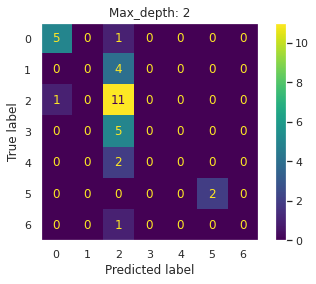

Accuracy:  0.46875


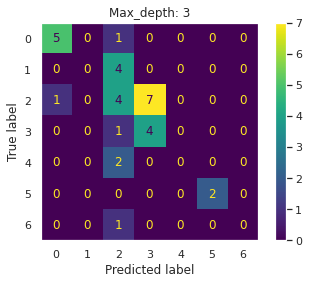

Accuracy:  0.71875


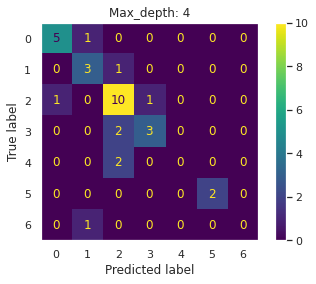

In [ ]:

print(y_mappings_ng)

for i in range(2,5,1):
  dtree_model = DecisionTreeClassifier(splitter = 'best',max_depth = i)
  dtree_model = dtree_model.fit(X_train, y_train)
  dtree_predictions = dtree_model.predict(X_test)

  acc = dtree_model.score(X_test, y_test)
  print("Accuracy: ", acc)

  cm = confusion_matrix(y_test, dtree_predictions, labels=dtree_model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree_model.classes_)
  disp.plot()
  plt.title('Max_depth: {}'.format(i))

  plt.grid(False)
  plt.show()




#### SVM

Accuracy:  0.65625


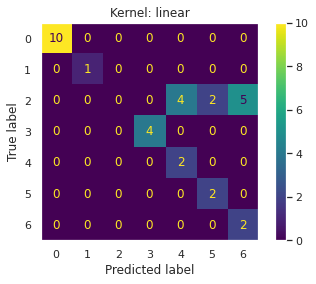

Accuracy:  0.40625


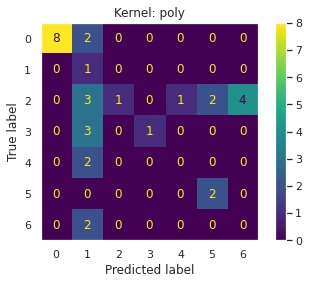

Accuracy:  0.65625


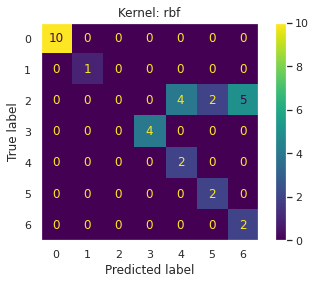

Accuracy:  0.53125


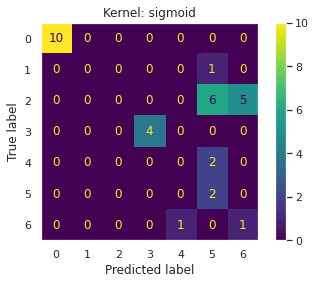

In [ ]:
from sklearn.svm import SVC

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernel:
  svm_model = SVC(kernel = k, C = 0.9, class_weight = 'balanced',  random_state=50)
  svm_model = svm_model.fit(X_train, y_train)
  svm_predictions = svm_model.predict(X_test)

  # model accuracy for X_test 
  acc = svm_model.score(X_test, y_test)
  print("Accuracy: ", acc)

  cm = confusion_matrix(y_test, svm_predictions, labels=svm_model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
  disp.plot()
  plt.title('Kernel: {}'.format(k))

  plt.grid(False)
  plt.show()

#### KNN

Accuracy:  0.8125


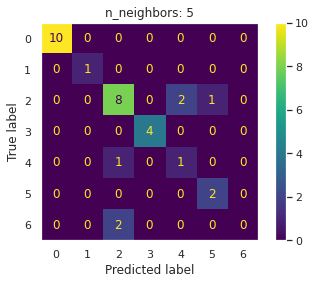

Accuracy:  0.75


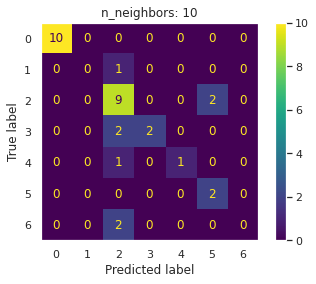

Accuracy:  0.6875


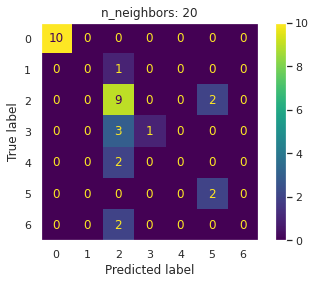

In [ ]:
K = [5,10,20]
for k in K:
  knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
  knn = knn.fit(X_train, y_train)
  knn_predictions = knn.predict(X_test)

  # model accuracy for X_test 
  acc = knn.score(X_test, y_test)
  print("Accuracy: ", acc)

  cm = confusion_matrix(y_test, knn_predictions, labels=knn.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
  disp.plot()
  plt.title('n_neighbors: {}'.format(k))

  plt.grid(False)
  plt.show()



#### Xarxes neuronals

Accuracy:  0.84375


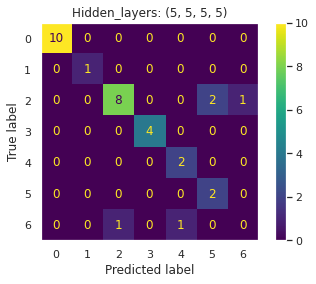

Accuracy:  0.8125


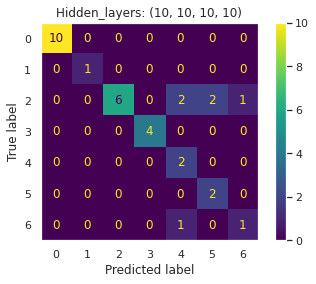

Accuracy:  0.8125


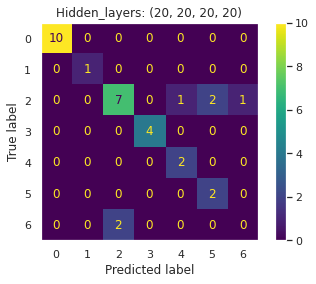

In [ ]:
layers = [(5,5,5,5), (10,10,10,10), (20,20,20,20)]
for l in layers:
  mlp = MLPClassifier(hidden_layer_sizes=l, max_iter=5000)
  mlp.fit(X_train, y_train)
  predictions = mlp.predict(X_test)

  # model accuracy for X_test 
  acc = mlp.score(X_test, y_test)
  print("Accuracy: ", acc)

  cm = confusion_matrix(y_test, predictions, labels=mlp.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
  disp.plot()
  plt.title('Hidden_layers: {}'.format(l))

  plt.grid(False)
  plt.show()




#### Regressió logísitica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
logreg.fit(X_train, y_train)

# Predict data points 
y_pred_test = logreg.predict(X_test)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Model accuracy score: 81.25%


### Amb dades agrupades

In [ ]:
features = dataset_group_le_norm.drop(['Species'], axis=1)
labels = dataset_group_le['Species']

X = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(y_test)

[2 0 0 0 3 0 1 0 1 1 3 2 1 4 3 0 1 2 4 2 0 1 2 1 1 2 2 1 4 0 1 3]


#### Arbres de decisió

{0: 'Bream', 1: 'Other', 2: 'Perch', 3: 'Pike', 4: 'Roach'}
Accuracy:  0.5625


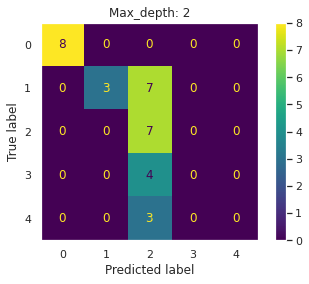

Accuracy:  0.5


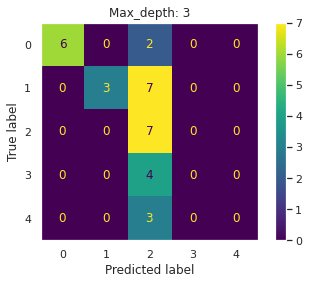

Accuracy:  0.5625


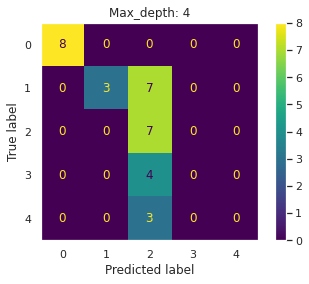

In [ ]:
print(y_mappings_g)

for i in range(2,5,1):
  dtree_model = DecisionTreeClassifier(splitter = 'best',max_depth = i)
  dtree_model = dtree_model.fit(X_train, y_train)
  dtree_predictions = dtree_model.predict(X_test)

  acc = dtree_model.score(X_test, y_test)
  print("Accuracy: ", acc)

  cm = confusion_matrix(y_test, dtree_predictions, labels=dtree_model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree_model.classes_)
  disp.plot()
  plt.title('Max_depth: {}'.format(i))

  plt.grid(False)
  plt.show()

#### SVM

Accuracy:  0.78125


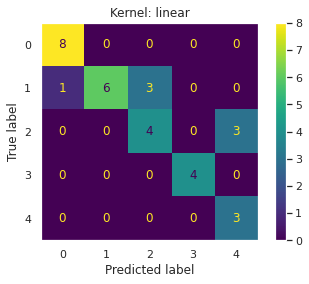

Accuracy:  0.53125


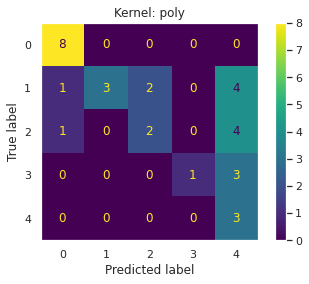

Accuracy:  0.75


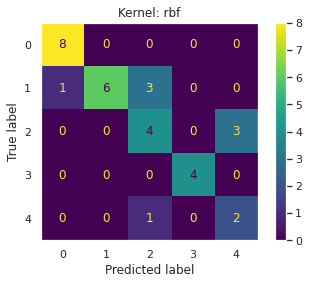

Accuracy:  0.5


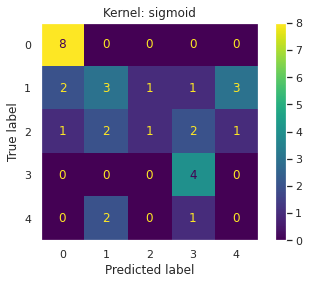

In [ ]:
from sklearn.svm import SVC

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernel:
  svm_model = SVC(kernel = k, C = 0.9, class_weight = 'balanced',  random_state=50)
  svm_model = svm_model.fit(X_train, y_train)
  svm_predictions = svm_model.predict(X_test)

  # model accuracy for X_test 
  acc = svm_model.score(X_test, y_test)
  print("Accuracy: ", acc)

  cm = confusion_matrix(y_test, svm_predictions, labels=svm_model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
  disp.plot()
  plt.title('Kernel: {}'.format(k))

  plt.grid(False)
  plt.show()

#### KNN

Accuracy:  0.8125


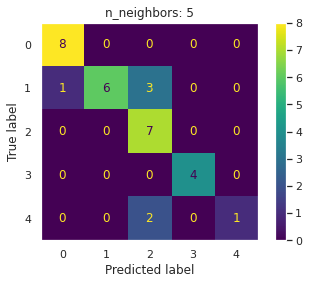

Accuracy:  0.6875


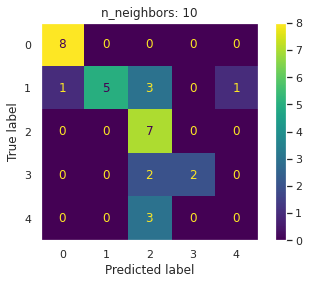

Accuracy:  0.53125


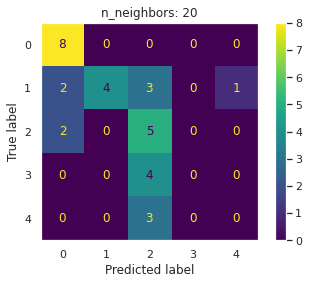

In [ ]:
K = [5,10,20]
for k in K:
  knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
  knn = knn.fit(X_train, y_train)
  knn_predictions = knn.predict(X_test)

  # model accuracy for X_test 
  acc = knn.score(X_test, y_test)
  print("Accuracy: ", acc)

  cm = confusion_matrix(y_test, knn_predictions, labels=knn.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
  disp.plot()
  plt.title('n_neighbors: {}'.format(k))

  plt.grid(False)
  plt.show()



#### Xarxes Neuronals

Accuracy:  0.875


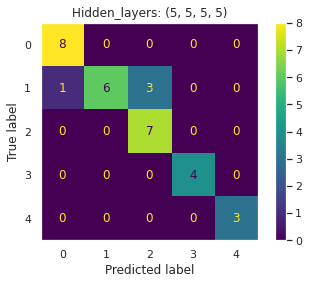

Accuracy:  0.84375


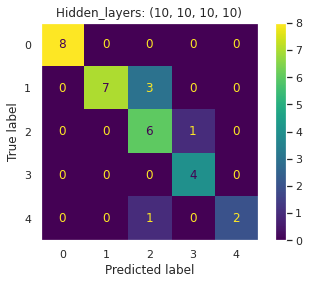

Accuracy:  0.875


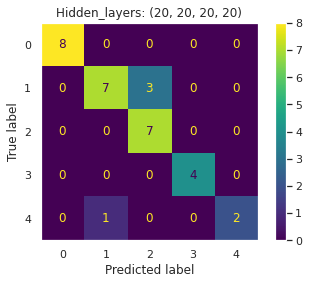

In [ ]:
layers = [(5,5,5,5), (10,10,10,10), (20,20,20,20)]
for l in layers:
  mlp = MLPClassifier(hidden_layer_sizes=l, max_iter=5000)
  mlp.fit(X_train, y_train)
  predictions = mlp.predict(X_test)

  # model accuracy for X_test 
  acc = mlp.score(X_test, y_test)
  print("Accuracy: ", acc)

  cm = confusion_matrix(y_test, predictions, labels=mlp.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
  disp.plot()
  plt.title('Hidden_layers: {}'.format(l))

  plt.grid(False)
  plt.show()

#### KNN + xarxes neuronals + svm

SVM:  [4 0 0 0 3 0 2 0 1 2 3 4 1 2 3 0 1 2 4 2 0 0 4 1 1 2 2 1 4 0 2 3]
KNN:  [2 0 0 0 3 0 2 0 1 2 3 2 1 2 3 0 1 2 2 2 0 0 2 1 1 2 2 1 4 0 2 3]
MLP:  [2 0 0 0 3 0 2 0 1 2 3 2 1 2 3 0 1 2 2 2 0 1 2 1 1 0 2 1 4 0 2 3]
TST:  [2 0 0 0 3 0 1 0 1 1 3 2 1 4 3 0 1 2 4 2 0 1 2 1 1 2 2 1 4 0 1 3]
NTS:  [2, 0, 0, 0, 3, 0, 2, 0, 1, 2, 3, 2, 1, 2, 3, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 4, 0, 2, 3]
Accuracy:  0.8125


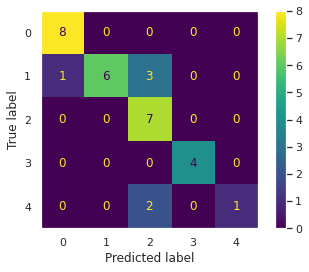

In [ ]:
svm_model = SVC(kernel = 'rbf', C = 0.9, class_weight = 'balanced')
svm_model = svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
knn = knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(5,5,5,5), max_iter=5000)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

print("SVM: ", svm_predictions)
print("KNN: ", knn_predictions)
print("MLP: ", predictions)
print("TST: ", y_test)

new_y_test = []
for i in range(0,len(y_test)):
  if knn_predictions[i] == predictions[i]:
    new_y_test.append(predictions[i]) 
  elif svm_predictions[i] == 4:
    new_y_test.append(svm_predictions[i])

  elif knn_predictions[i] != predictions[i] and predictions[i] == svm_predictions[i]:
    new_y_test.append(predictions[i]) 

  elif knn_predictions[i] != predictions[i] and predictions[i] != svm_predictions[i] and svm_predictions[i] == knn_predictions[i]:
    new_y_test.append(svm_predictions[i])

  else:
    new_y_test.append(predictions[i]) 

print("NTS: ", new_y_test)

encerts = 0
for x,i in zip(new_y_test, y_test):
  if x == i:
    encerts = encerts +1
print("Accuracy: ", encerts/len(y_test))
cm = confusion_matrix(y_test, new_y_test, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()

plt.grid(False)
plt.show()


## Optimització d'hyperparàmetres


### Dades no agrupades

In [ ]:
features = dataset_def_le_norm.drop(['Species'], axis=1)
labels = dataset_def_le['Species']

X = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle= True)

print(y_test)

[5 1 0 5 6 2 0 3 2 0 1 2 2 5 4 2 3 0 2 2 0 2 2 4 4 3 0 2 0 5 4 4]


#### Arbres de decisió

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
parametres = {'criterion':['gini', 'entropy'],
              'splitter':['best', 'random'],
              'max_depth':[1,2,3,4],
              'max_features':['sqrt', 'log2', None],
              'class_weight':['balanced', None]
}

In [ ]:
t_acc_ad_ng = []

for i in range(2,6,1):
  print("k cross-validation: ", i)
  classifier = GridSearchCV(model, parametres, cv=i)
  classifier.fit(X_train,y_train)
  print(classifier.best_params_)
  print(classifier.best_score_)
  t_acc_ad_ng.append(classifier.best_score_)

k cross-validation:  2
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'splitter': 'best'}
0.693328373015873
k cross-validation:  3
{'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'splitter': 'random'}
0.7401255075673681
k cross-validation:  4
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'splitter': 'best'}
0.7240423387096774
k cross-validation:  5
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'splitter': 'best'}
0.7483076923076923


#### SVM

In [ ]:
model = SVC()

In [ ]:
parametres = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma':['scale', 'auto'],
              'degree':[1,2,3],
              'decision_function_shape':['ovo', 'ovr'],
              'class_weight':['balanced', None]
}

In [ ]:
t_acc_svc_ng = []
for i in range(2,6,1):
  print("cv: ", i)
  classifier = GridSearchCV(model, parametres, cv=i)
  classifier.fit(X_train,y_train)
  print(classifier.best_params_)
  print(classifier.best_score_)

  t_acc_svc_ng.append(classifier.best_score_)

cv:  2
{'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.8110119047619048
cv:  3
{'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.8189368770764119
cv:  4
{'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.8188004032258065
cv:  5
{'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.8187692307692307


#### KNN

In [ ]:
model = KNeighborsClassifier()

In [ ]:
parametres = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,1,17,18,19,20],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree','brute']
}

In [ ]:
t_acc_knn_ng = []
for i in range(2,6,1):
  print("cv: ", i)
  classifier = GridSearchCV(model, parametres, cv=i)
  classifier.fit(X_train,y_train)
  print(classifier.best_params_)
  print(classifier.best_score_)
  t_acc_knn_ng.append(classifier.best_score_)

cv:  2
{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}
0.7878224206349207
cv:  3
{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
0.811000369139904
cv:  4
{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
0.8109879032258065
cv:  5
{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
0.8033846153846154


#### Xarxes Neuronals

In [ ]:
model = MLPClassifier()

In [ ]:
parametres = {
              'hidden_layer_sizes': [(5,5,5), (5,5,7), (5,5,5,7), (5,5,5,5), (10,10,10), (10,10,7), (10,10,10,7), (10,10,10,10)],
              'activation':['identity', 'logistic', 'tanh', 'relu'],
              'solver': [ 'sgd', 'adam'],
              'max_iter':[5000,10000]


}
t_acc_mlp_ng = []

In [ ]:
t_acc_mlp_ng = []

for i in range(2,6,1):
  print("cv: ", i)
  classifier = GridSearchCV(model, parametres, cv=i)
  classifier.fit(X_train,y_train)
  print(classifier.best_params_)
  print(classifier.best_score_)
  t_acc_mlp_ng.append(classifier.best_score_)

cv:  2
{'activation': 'identity', 'hidden_layer_sizes': (10, 10, 10), 'max_iter': 10000, 'solver': 'adam'}
0.8582589285714286
cv:  3
{'activation': 'identity', 'hidden_layer_sizes': (5, 5, 7), 'max_iter': 5000, 'solver': 'adam'}
0.8660022148394241
cv:  4
{'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 7), 'max_iter': 5000, 'solver': 'adam'}
0.8659274193548387
cv:  5
{'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 5000, 'solver': 'adam'}
0.8735384615384616


#### Representació

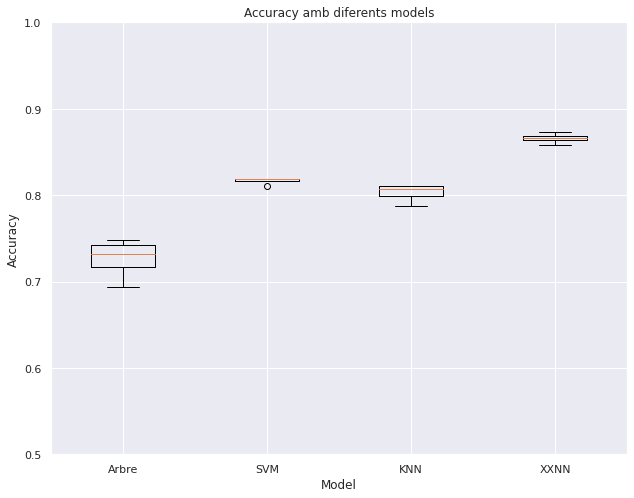

In [ ]:
data = [t_acc_ad_ng, t_acc_svc_ng, t_acc_knn_ng, t_acc_mlp_ng] 
  
fig = plt.figure(figsize =(8, 6)) 
  
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data) 

plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.yticks([0.5,0.6,0.7,0.8,0.9,1])
ax.set_xticklabels(['Arbre', 'SVM', 'KNN', 'XXNN']) 
plt.title('Accuracy amb diferents models')
  
plt.show() 

### Dades agrupades

In [ ]:
features = dataset_group_le_norm.drop(['Species'], axis=1)
labels = dataset_group_le['Species']


X = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(y_test)

[0 1 2 4 2 1 1 4 0 2 2 2 3 3 2 1 0 1 4 1 0 2 0 0 2 2 3 1 4 2 2 4]


#### Arbres de decisió

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
parametres = {'criterion':['gini', 'entropy'],
              'splitter':['best', 'random'],
              'max_depth':[1,2,3,4],
              'max_features':['sqrt', 'log2', None],
              'class_weight':['balanced', None]
}

In [ ]:
t_acc_ad_g = []
for i in range(2,11,1):
  print("cv: ", i)
  classifier = GridSearchCV(model, parametres, cv=i)
  classifier.fit(X_train,y_train)
  print(classifier.best_params_)
  print(classifier.best_score_)
  t_acc_ad_g.append(classifier.best_score_)

cv:  2
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'splitter': 'best'}
0.7243303571428572
cv:  3
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'splitter': 'best'}
0.7325581395348838
cv:  4
{'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'splitter': 'best'}
0.7404233870967742
cv:  5
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'splitter': 'best'}
0.7166153846153847
cv:  6
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'splitter': 'best'}
0.7326839826839827
cv:  7
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'splitter': 'best'}
0.7259816207184627
cv:  8
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'splitter': 'best'}
0.7171875
cv:  9
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features':

#### SVM

In [ ]:
model = SVC()

In [ ]:
parametres = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma':['scale', 'auto'],
              'degree':[1,2,3],
              'decision_function_shape':['ovo', 'ovr'],
              'class_weight':['balanced', None]
}

In [ ]:
t_acc_svc_g = []

for i in range(2,11,1):
  print("cv: ", i)
  classifier = GridSearchCV(model, parametres, cv=i)
  classifier.fit(X_train,y_train)
  print(classifier.best_params_)
  print(classifier.best_score_)
  t_acc_svc_g.append(classifier.best_score_)

cv:  2
{'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.8268849206349207
cv:  3
{'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.8187523071244002
cv:  4
{'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.8185483870967742
cv:  5
{'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.8264615384615384
cv:  6
{'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.8264790764790764
cv:  7
{'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.8270676691729323
cv:  8
{'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.8265625
cv:  9
{'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma':

#### KNN

In [ ]:
model = KNeighborsClassifier()

In [ ]:
parametres = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,1,17,18,19,20],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree','brute'],
}

In [ ]:
t_acc_knn_g = []

for i in range(2,11,1):
  print("cv: ", i)
  classifier = GridSearchCV(model, parametres, cv=i)
  classifier.fit(X_train,y_train)
  print(classifier.best_params_)
  print(classifier.best_score_)
  t_acc_svc_g.append(classifier.best_score_)


cv:  2
{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
0.7951388888888888
cv:  3
{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
0.7718715393133998
cv:  4
{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
0.8107358870967742
cv:  5
{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
0.7793846153846153
cv:  6
{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
0.795093795093795
cv:  7
{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
0.7957393483709273
cv:  8
{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
0.8109375
cv:  9
{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}
0.7878306878306878
cv:  10
{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}
0.7865384615384615


#### Xarxes neuronals

In [ ]:
model = MLPClassifier()

In [ ]:
parametres = {
              'hidden_layer_sizes': [(5,5,5),(5,5,5,5), (10,10,10),(10,10,5),(10,10,10,5),(10,10,10,10)],
              'activation':['identity', 'logistic', 'tanh', 'relu'],
              'solver': [ 'sgd', 'adam'],
              'max_iter':[5000,10000]


}

In [ ]:
t_acc_mlp_g = []
for i in range(2,11,1):
  print("cv: ", i)
  classifier = GridSearchCV(model, parametres, cv=i)
  classifier.fit(X_train,y_train)
  print(classifier.best_params_)
  print(classifier.best_score_)
  t_acc_mlp_g.append(classifier.best_score_)

cv:  2
{'activation': 'identity', 'hidden_layer_sizes': (10, 10, 10), 'max_iter': 5000, 'solver': 'adam'}
0.8582589285714286
cv:  3
{'activation': 'identity', 'hidden_layer_sizes': (10, 10, 5), 'max_iter': 10000, 'solver': 'adam'}
0.8660022148394241
cv:  4
{'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 5), 'max_iter': 10000, 'solver': 'adam'}
0.8732358870967742
cv:  5
{'activation': 'identity', 'hidden_layer_sizes': (10, 10, 5), 'max_iter': 10000, 'solver': 'adam'}
0.858153846153846
cv:  6
{'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10), 'max_iter': 5000, 'solver': 'adam'}
0.8733766233766233
cv:  7
{'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 10000, 'solver': 'adam'}
0.8575605680868839
cv:  8


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10, 10), 'max_iter': 10000, 'solver': 'adam'}
0.8744791666666667
cv:  9
{'activation': 'identity', 'hidden_layer_sizes': (10, 10, 10), 'max_iter': 10000, 'solver': 'adam'}
0.8656084656084656
cv:  10
{'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10, 10), 'max_iter': 5000, 'solver': 'adam'}
0.8634615384615385


#### Representació

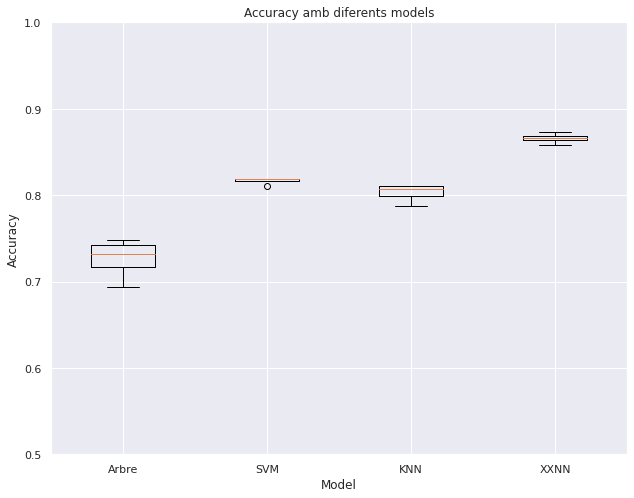

In [ ]:
data = [t_acc_ad_ng, t_acc_svc_ng, t_acc_knn_ng, t_acc_mlp_ng] 
  
fig = plt.figure(figsize =(8, 6)) 
  
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data) 

plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.yticks([0.5,0.6,0.7,0.8,0.9,1])
ax.set_xticklabels(['Arbre', 'SVM', 'KNN', 'XXNN']) 
plt.title('Accuracy amb diferents models')
  
plt.show() 

## Lazy Predictor

In [ ]:
try:
    import lazypredict
except:
    !pip install lazypredict;
finally:
    from lazypredict.Supervised import LazyClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
##no agrupades
features = dataset_def_le_norm.drop(['Species'], axis=1)
labels = dataset_def_le['Species']

X = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=100)

clf = LazyClassifier(ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 23.95it/s]


In [ ]:
models.sort_values('Accuracy', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.91,0.94,None,0.91,0.02
KNeighborsClassifier,0.84,0.72,None,0.81,0.01
XGBClassifier,0.81,0.76,None,0.80,0.20
LinearDiscriminantAnalysis,0.78,0.69,None,0.77,0.01
SGDClassifier,0.78,0.68,None,0.74,0.01
CalibratedClassifierCV,0.78,0.67,None,0.70,0.09
Perceptron,0.78,0.67,None,0.70,0.02
RandomForestClassifier,0.78,0.62,None,0.75,0.17
DecisionTreeClassifier,0.78,0.83,None,0.78,0.01


In [ ]:
##agrupades

features = dataset_group_le_norm.drop(['Species'], axis=1)
labels = dataset_group_le['Species']


X = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=100)

clf = LazyClassifier(ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 31.06it/s]


In [ ]:
models.sort_values('Accuracy', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.84,0.86,None,0.84,0.01
RandomForestClassifier,0.84,0.84,None,0.84,0.17
DecisionTreeClassifier,0.84,0.84,None,0.83,0.01
KNeighborsClassifier,0.81,0.80,None,0.80,0.01
XGBClassifier,0.81,0.73,None,0.78,0.05
BaggingClassifier,0.78,0.70,None,0.77,0.03
ExtraTreesClassifier,0.78,0.72,None,0.78,0.14
SVC,0.75,0.74,None,0.69,0.01
LGBMClassifier,0.75,0.67,None,0.72,0.05


In [ ]:
features = dataset.drop(['Species'], axis=1)
labels = dataset['Species']


X = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=100)

clf = LazyClassifier(ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:02<00:00, 10.87it/s]


In [ ]:
models.sort_values('Accuracy', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.97,0.98,None,0.97,0.04
QuadraticDiscriminantAnalysis,0.91,0.76,None,0.89,0.03
ExtraTreesClassifier,0.84,0.73,None,0.83,0.30
DecisionTreeClassifier,0.84,0.85,None,0.83,0.02
KNeighborsClassifier,0.81,0.70,None,0.78,0.04
RandomForestClassifier,0.81,0.70,None,0.78,0.66
XGBClassifier,0.78,0.75,None,0.77,0.21
ExtraTreeClassifier,0.78,0.69,None,0.77,0.02
LogisticRegression,0.78,0.68,None,0.74,0.13


why? xd

### QuadraticAnalisys

In [ ]:
accuracy = []

In [ ]:
features = dataset_def_le_norm.drop(['Species'], axis=1)
labels = dataset_def_le['Species']

X = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=100)

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

acu = metrics.accuracy_score(y_test,y_pred)
print(acu)
accuracy.append(acu)


0.90625


Ara aplicarem GridSearch per veure si podem millorar aquesta accuracy

In [ ]:
model = QuadraticDiscriminantAnalysis()

In [ ]:
parametres = {'reg_param':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'tol':[1.0e-4,1.0e-3,1.0e-2],
}

In [ ]:
for i in range(2,11,1):
  print("cv: ", i)
  classifier = GridSearchCV(model, parametres, cv=i)
  classifier.fit(X_train,y_train)
  print(classifier.best_params_)
  print(classifier.best_score_)
  accuracy.append(classifier.best_score_)

cv:  2
{'reg_param': 0.1, 'tol': 0.0001}
0.7876984126984127
cv:  3
{'reg_param': 0.0, 'tol': 0.0001}
0.7870062753783684
cv:  4
{'reg_param': 0.2, 'tol': 0.0001}
0.7552923387096774
cv:  5
{'reg_param': 0.2, 'tol': 0.0001}
0.7707692307692308
cv:  6
{'reg_param': 0.2, 'tol': 0.0001}
0.7795815295815296
cv:  7
{'reg_param': 0.2, 'tol': 0.0001}
0.8032581453634086
cv:  8
{'reg_param': 0.2, 'tol': 0.0001}
0.7713541666666667
cv:  9
{'reg_param': 0.2, 'tol': 0.0001}
0.8031746031746032
cv:  10
{'reg_param': 0.2, 'tol': 0.0001}
0.7878205128205129


In [ ]:
print(accuracy)

[0.90625, 0.7876984126984127, 0.7870062753783684, 0.7552923387096774, 0.7707692307692308, 0.7795815295815296, 0.8032581453634086, 0.7713541666666667, 0.8031746031746032, 0.7878205128205129]


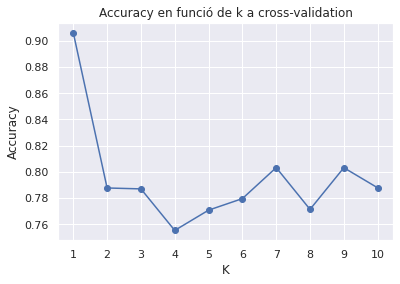

In [ ]:
plt.plot([1,2,3,4,5,6,7,8,9,10], accuracy, marker="o")
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.title('Accuracy en funció de k a cross-validation')
plt.xticks([1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10])
plt.show()

## Comparació amb altres treballs

https://www.kaggle.com/code/mayurkagathara/multiple-classification-models

##### Regressió Logística

In [ ]:
features = dataset_def_le_norm.drop(['Species'], axis=1)
labels = dataset_def_le['Species']

X = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)
print(y_test)


[0 2 2 2 1 1 2 0 0 4 5 2 2 2 0 0 1 2 2 2 2 3 0 5 0 4 6 0 2 5 5 2]


In [ ]:
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train, y_train)
print("Accuracy: ", round(model_logistic_regression.score(X_test, y_test),4))

Accuracy:  0.8125


{0: 'Bream', 1: 'Parkki', 2: 'Perch', 3: 'Pike', 4: 'Roach', 5: 'Smelt', 6: 'Whitefish'}


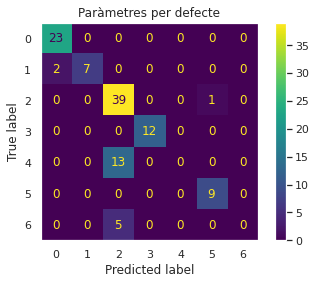

In [ ]:
print(y_mappings_ng)

plot_confusion_matrix(model_logistic_regression, X_train, y_train);
plt.title('Paràmetres per defecte')
plt.grid(False)

In [ ]:
model_logistic_regression_2 = LogisticRegression(penalty='none')
model_logistic_regression_2.fit(X_train, y_train)
print("Accuracy: ", round(model_logistic_regression_2.score(X_test, y_test),4))

Accuracy:  0.8958


{0: 'Bream', 1: 'Parkki', 2: 'Perch', 3: 'Pike', 4: 'Roach', 5: 'Smelt', 6: 'Whitefish'}


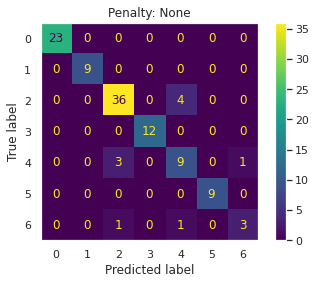

In [ ]:
print(y_mappings_ng)
plot_confusion_matrix(model_logistic_regression_2, X_train, y_train);
plt.title('Penalty: None')
plt.grid(False)

In [ ]:
model_logistic_regression_3 = LogisticRegression(C=0.0,penalty='none', class_weight='balanced')
model_logistic_regression_3.fit(X_train, y_train)
model_logistic_regression_3.score(X_test, y_test)

0.8541666666666666

{0: 'Bream', 1: 'Parkki', 2: 'Perch', 3: 'Pike', 4: 'Roach', 5: 'Smelt', 6: 'Whitefish'}


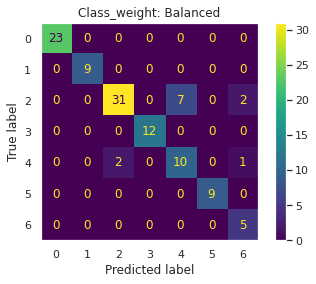

In [ ]:
print(y_mappings_ng)
plot_confusion_matrix(model_logistic_regression_3, X_train, y_train);
plt.title('Class_weight: Balanced')
plt.grid(False)

In [ ]:
parameters = {'penalty':['l2', 'l1'], 'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 'class_weight':['balanced', None]}
lr = LogisticRegression(solver='liblinear')
estimators = []
scores = []

for i in range(0,10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf = GridSearchCV(lr, parameters, cv=4)
  clf.fit(X_train, y_train)
  print('Best_estimator: ',clf.best_estimator_)
  print('Best Score: ', clf.best_score_)
  estimators.append(clf.best_estimator_)
  scores.append(clf.best_score_)

Best_estimator:  LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')
Best Score:  0.8823084677419355
Best_estimator:  LogisticRegression(C=0.6, class_weight='balanced', penalty='l1',
                   solver='liblinear')
Best Score:  0.858366935483871
Best_estimator:  LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')
Best Score:  0.8503024193548387
Best_estimator:  LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')
Best Score:  0.8737399193548387
Best_estimator:  LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')
Best Score:  0.8344254032258065
Best_estimator:  LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')
Best Score:  0.8266129032258065
Best_estimator:  LogisticRegression(C=0.9, class_weight='balanced', penalty='l1',
                   solver='liblinear')
Best Score:  0.8276209677419355
Best_estimator:  LogisticRegression(class_weight='balanced',

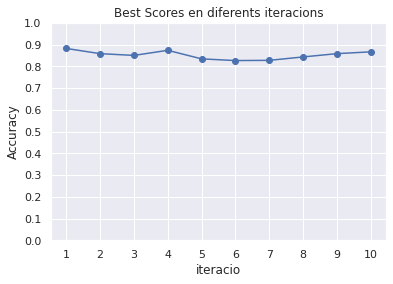

In [ ]:
plt.plot([1,2,3,4,5,6,7,8,9,10], scores, marker="o")
plt.ylabel('Accuracy')
plt.xlabel('iteracio')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('Best Scores en diferents iteracions')
plt.xticks([1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10])
plt.show()

Fem feature impportance

Accuracy:  0.8438


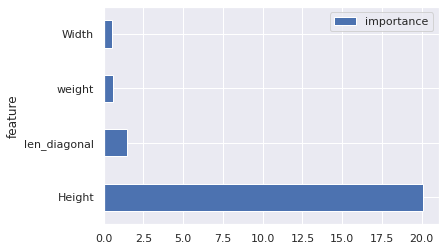

In [ ]:
import math

features = dataset_group_le_norm.drop(['Species'], axis=1)
labels = dataset_group_le['Species']

X = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy: ", round(model.score(X_test, y_test),4))

w0 = model.intercept_[0]
w = w1, w2, w3, w4 = model.coef_[0]
feature_names = ['weight', 'len_diagonal', 'Height', 'Width']
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

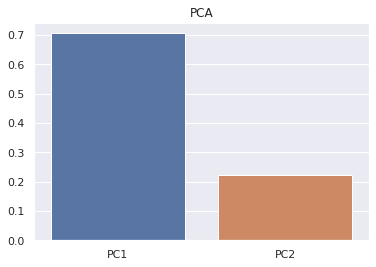

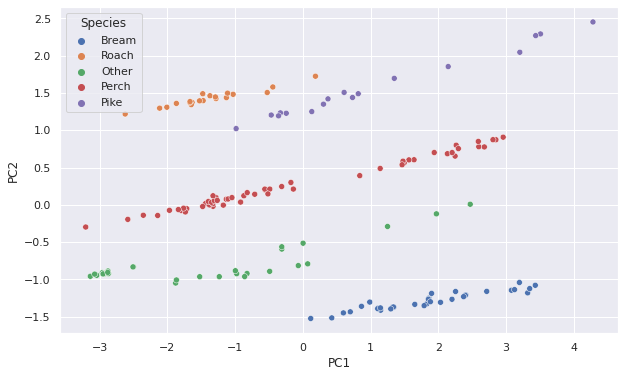

In [ ]:
pca2 = PCA(n_components=2, random_state=42)
pca_group = pca2.fit_transform(dataset_group_le_norm[dataset_group_le_norm.columns])

# Creem un dataset amb les dues components principals

df_pca_g = pd.DataFrame({'PC1' : pca_group[:,0], 'PC2' : pca_group[:,1], 'Species': dataset_group_le_norm['Species']})

pca2.explained_variance_ratio_ # variança de les dues variables
pca2.explained_variance_ratio_.sum() #cuanta variança tenen aquestes dues components principals envers a totes les altres

plt.figure()
plt.title("PCA")
sns.barplot(x=['PC1', 'PC2'], y=pca2.explained_variance_ratio_)

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue=dataset_def_group['Species'], data=df_pca_g)

Entrenem el dataset següent formar amb les dues components principals del PCA

In [ ]:
df_pca_g

,PC1,PC2,Species
0,0.116,-1.523,-1.359
1,0.427,-1.516,-1.359
2,0.599,-1.449,-1.359
3,0.700,-1.434,-1.359
4,0.987,-1.304,-1.359
...,...,...,...
154,-2.877,-0.887,-0.570
155,-2.871,-0.921,-0.570
156,-2.880,-0.905,-0.570
157,-2.501,-0.831,-0.570


Accuracy:  1.0


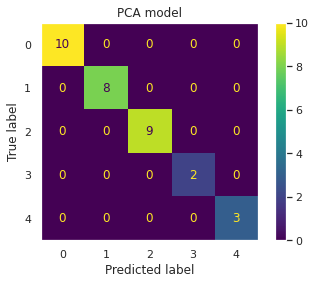

In [ ]:
features = df_pca_g.drop(['Species'], axis=1)
labels = dataset_group_le['Species']

X = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  
model_logistic_regression_pca = LogisticRegression(class_weight='balanced')
model_logistic_regression_pca.fit(X_train, y_train)
model_logistic_regression_pca.score(X_test, y_test)
pca_predictions = model_logistic_regression_pca.predict(X_test)

acc = model_logistic_regression_pca.score(X_test, y_test)
print("Accuracy: ", acc)

cm = confusion_matrix(y_test, pca_predictions, labels=model_logistic_regression_pca.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_logistic_regression_pca.classes_)
disp.plot()
plt.title('PCA model')

plt.grid(False)
plt.show()


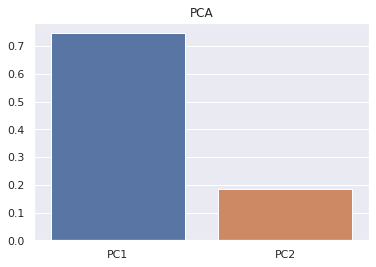

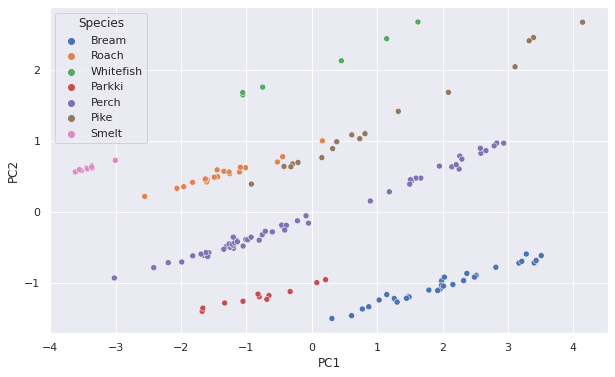

In [ ]:
pca = PCA(n_components=2, random_state=42)
pca_def = pca.fit_transform(dataset_def_le_norm[dataset_def_le_norm.columns])

# Creem un dataset amb les dues components principals

df_pca = pd.DataFrame({'PC1' : pca_def[:,0], 'PC2' : pca_def[:,1], 'Species': dataset_def_le['Species']})

pca.explained_variance_ratio_ # variança de les dues variables
pca.explained_variance_ratio_.sum() #cuanta variança tenen aquestes dues components principals envers a totes les altres

plt.figure()
plt.title("PCA")
sns.barplot(x=['PC1', 'PC2'], y=pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue=dataset_def['Species'], data=df_pca)

In [ ]:
df_pca

,PC1,PC2,Species
0,0.306,-1.496,0
1,0.608,-1.457,0
2,0.772,-1.362,0
3,0.871,-1.331,0
4,1.146,-1.160,0
...,...,...,...
154,-3.366,0.651,5
155,-3.359,0.617,5
156,-3.369,0.633,5
157,-3.001,0.726,5


Accuracy:  0.9375


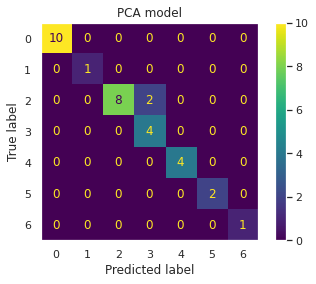

In [ ]:
features = df_pca.drop(['Species'], axis=1)
labels = dataset_def_le['Species']

X = features.values
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  
model_logistic_regression_pca = LogisticRegression(class_weight='balanced')
model_logistic_regression_pca.fit(X_train, y_train)
model_logistic_regression_pca.score(X_test, y_test)
pca_predictions = model_logistic_regression_pca.predict(X_test)

acc = model_logistic_regression_pca.score(X_test, y_test)
print("Accuracy: ", acc)

cm = confusion_matrix(y_test, pca_predictions, labels=model_logistic_regression_pca.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_logistic_regression_pca.classes_)
disp.plot()
plt.title('PCA model')

plt.grid(False)
plt.show()
